Since you’ve decided to view this blog, I suspect that you’re either currently facing a challenge that arise when working with large datasets.The symptoms are easy to spot: painfully long run times - even for the simplest of calculations, unstable code, and unwieldy workflows.

**But don’t despair!**

This blog aims to take your data science skills to the next level by giving you the tools and techniques you need to analyze and model large datasets using Dask.

# Challenges with Python Libraries (Numpy, Pandas) :

**Pandas** - It is a Python package providing fast, flexible and expressive data structures designed to make working with “relational” or “labelled” data both easy and intuitive. Pandas is mainly used for handling tabular data.

**NumPy** – Contains a powerful N-dimensional array object, tools for integrating C/C++ and Fortran code.

Usually people think that Python is slow. This is true for standard Python objects, however NumPy and Pandas libraries are mostly written in C/Fortran, which makes them significantly faster.

Both packages are designed for:

    - In-memory data – i.e. you can’t work with datasets that are larger than your RAM
    - Single core execution by default.
    
Pandas and Numpy are great libraries but they are not always computationally efficient, especially when there are GBs of data to manipulate. 
Sometimes when trying to work with large datasets in Pandas, your machine just freezes, and you’re stuck. It starts heating up while doing simplest of machine learning tasks? 

# DASK

This is where Dask comes into play.

Dask is popularly known as a ‘parallel computing’ python library that has been designed to run across multiple systems. It is a specification to encode parallel algorithms, using primitive Python dictionaries, tuples, and callables.

Dask is a specification that encodes task schedules with minimal incidental complexity using terms common to all Python projects, namely dicts, tuples, and callables.

Once you start using Dask, you won’t look back.
If you are familiar with pandas and numpy, you will find working with Dask fairly easy.
# Advantages of Dask:
- Dask natively scales NumPy, Pandas, and Scikit-Learn
- Dask has a very low configuration and maintenance overhead
- Dask can be used effectively to work with both medium datasets on a single machine and large datasets on a cluster
- Dask can be used as a general framework for parallelizing most Python objects
- Dask can be used for Accelerating long computations by using many cores
- On your local machine, you can parallelize using Multithreading or Multiprocessing

# Dask Collections
We can think of Dask at a high and a low level

- **High level collections:** The dask collections (array, bag, dataframe) provide reasonable access to parallelism and out-of-core execution. These significantly extend the scale of data that is convenient to manipulateDask's high-level collections are alternatives to NumPy and Pandas for large datasets.

- **Low Level schedulers:** Dask provides dynamic task **schedulers** that execute task graphs in parallel. These execution engines power the high-level collections mentioned above but can also power custom, user-defined workloads. These schedulers are low-latency (around 1ms) and work hard to run computations in a small memory footprint

Different users operate at different levels but it is useful to understand both.


# So How Does Dask Work?

The API of the selected Collection produces a Task graph.A dask graph is a dictionary mapping identifying keys to
values or tasks. As all the operations are lazy loaded, nothing is executed at that moment. 

Once you run the computation, the scheduler executes the operations from the task graph.
The scheduler can reside on your local machine and use a thread or a process pool, or it can reside on a distributed cluster.
There are 3 main components:

    Scheduler – the whole workflow is coordinated by scheduler
    Workers – distributed work and storage – computation, holds data in distributed memory
    Clients – clients make interfaces with the users through the API

Now, We can go through quick guide and usage of dask collections...

# What is Dask Array
The dask.array submodule uses dask graphs to create a NumPy-like library that uses all of your cores and operates on datasets that do not fit in memory. It does this by building up a dask graph of blocked array algorithms.

Some of the significant features are:
- **Parallel**
- **Larger-than-memory**
- **Blocked Algorithms**

In [0]:
import numpy as np 
import dask.array as da

In [0]:
%%time 
x = np.random.normal(10, 0.1, size=(20000, 20000)) 
y = x.mean(axis=0)[::100] 
y

CPU times: user 16.6 s, sys: 1.37 s, total: 17.9 s
Wall time: 18 s


Lets do the same by using Dask.array....

**Create dask.array object**

You can create a dask.array Array object with the da.from_array function. These objects contain the following data

1) A dask graph

2) Information about shape and chunk shape,

3) A name identifying which keys in the graph correspond
   to the result
   
4) A dtype

In [0]:
%%time
x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(1000, 1000))
y = x.mean(axis=0)[::100] 
y.compute() 

CPU times: user 24.6 s, sys: 179 ms, total: 24.8 s
Wall time: 12.6 s


You can Manipulate dask.array object as you would a numpy array

The interface is familiar, but the actual work is different. We should note that dask_array.sum() does not do the same thing as numpy_array.sum().

**What has happened?**

dask_array.sum() builds an expression of the computation. It does not do the computation yet. numpy_array.sum() computes the sum immediately.

**Why?**

Dask arrays are split into chunks. Each chunk must have computations run on that chunk explicitly. If the desired answer comes from a small slice of the entire dataset, running the computation over all data would be wasteful of CPU and memory.

# Chunks
Dask divides arrays into many small pieces, called chunks, each of which is presumed to be small enough to fit into memory.
Thinking about and controlling chunking is important to optimize advanced algorithms.

**Note:**
- You should specify a chunks argument to tell dask.array how to break up the underlying array into chunks.
- Remember that, Your chunks input will be normalized and stored in the third and most explicit form.
- chunks stands for “chunk shape” rather than “number of chunks”, so specifying chunks=1 means that you will have many chunks, each with exactly one element.

**To get good performance, choice of chunks would be as follows:**
- As, We’ll have many chunks in memory at once, A chunk should be small enough to fit comfortably in memory
- A task should take longer than 100ms, So chunk must be large enough so that computations on that chunk take significantly longer than the 1ms overhead per task that Dask scheduling incurs.
- Chunks should align with your storage and the computation that you want to do.

In [0]:
%%time
#Performing Matrix multiplication 
#A 2-dimensional array of size 3 x 3, composed of 2-byte integer elements:
x = np.array([[1, 2, 3], [4, 5, 6],[7, 8, 9]])
#A 3-dimensional array of size 3 x 3 x 3, composed of 2-byte integer elements:
y = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
                  [[10, 11, 12], [13, 14, 15], [16, 17, 18]]])
 # multiply()is used to multiply matrices
print ("Multiplication of two matrices: ")
print (np.multiply(x,y))

Multiplication of two matrices: 
[[[  1   4   9]
  [ 16  25  36]
  [ 49  64  81]]

 [[ 10  22  36]
  [ 52  70  90]
  [112 136 162]]

 [[ 10  22  36]
  [ 52  70  90]
  [112 136 162]]]
CPU times: user 888 µs, sys: 8 µs, total: 896 µs
Wall time: 756 µs


In [0]:
%%time
#A 2-dimensional array of size 3 x 3, composed of 2-byte integer elements:
x = da.array([[1, 2, 3], [4, 5, 6],[7, 8, 9]])
#A 3-dimensional array of size 3 x 3 x 3, composed of 2-byte integer elements:
a = da.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
                  [[10, 11, 12], [13, 14, 15], [16, 17, 18]]])
y = da.asarray(a,chunks=(1,3,3))
print ("Multiplication of two matrices: ")
print (da.multiply(x,y).compute())

Multiplication of two matrices: 
[[[  1   4   9]
  [ 16  25  36]
  [ 49  64  81]]

 [[ 10  22  36]
  [ 52  70  90]
  [112 136 162]]

 [[ 10  22  36]
  [ 52  70  90]
  [112 136 162]]]
CPU times: user 3.91 ms, sys: 1.01 ms, total: 4.92 ms
Wall time: 4.42 ms


**Visualize task graphs**
You might consider visualizing the underlying task graph before executing your computation . You can learn more about potential bottlenecks where parallelism may not be possile, or areas where many tasks depend on each other, which may cause a great deal of communication.

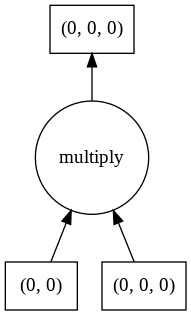

In [0]:
da.multiply(x,y).visualize()

# Custom Workloads with Dask Delayed
Systems like Dask.dataframe are built with Dask.delayed. If you have a problem that is paralellizable, but isn't as simple as just a big array or a big dataframe, then dask.delayed may be the right choice for you.It allows users to delay function calls into a task graph with dependencies.

We can call **dask.delayed** on our funtions to make them lazy. Rather than compute their results immediately, they record what we want to compute as a task into a graph that we'll run later on parallel hardware

We setup a Dask client, which provides performance and progress metrics via the dashboard.
You can view the dashboard by clicking the link after running the cell.

In [12]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

E:\laptop softwares\anoconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Client Scheduler: tcp://127.0.0.1:58768 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 4 Memory: 8.50 GB


# Create simple functions
These functions do simple operations like add two numbers together, but they sleep for a random amount of time to simulate real work.

In [0]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [0]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other
x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 110 ms, sys: 12.3 ms, total: 123 ms
Wall time: 3 s


These ran one after the other, in sequence. Note though that the first two lines inc(1) and dec(2) don't depend on each other, we could have called them in parallel had we been clever.

In [0]:
from dask import delayed
# This runs immediately, all it does is build a graph
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

In [0]:
%%time
# This actually runs our computation using a local process pool
z.compute()

CPU times: user 106 ms, sys: 29.5 ms, total: 135 ms
Wall time: 2.31 s


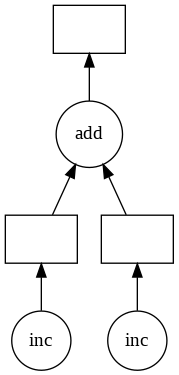

In [0]:
z.visualize()

# Dask Bags
A bag is an unordered collection with repeats.Dask Bag implements operations like map, filter, groupby and aggregations on collections of Python objects. It does this in parallel and in small memory using Python iterators.

**Common Uses**:
- We find that it is particularly useful on the front lines of data analysis, particularly in parsing and cleaning up initial data dumps like JSON or log files because it combines the streaming properties and solid performance of projects like cytoolz with the parallelism of multiple processes.
- Dask bags coordinate many Python lists or Iterators, each of which forms a partition of a larger collection.

In a nutshell

    dask.bag = map, filter, toolz + parallel execution

In [1]:
# Create Bag from sequence
import dask.bag as db
b = db.from_sequence(range(5))
list(b.filter(lambda x: x % 2 == 0).map(lambda x: x * 10)) 

E:\laptop softwares\anoconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


[0, 20, 40]

In [2]:
b = db.from_sequence(range(10))
>>> iseven = lambda x: x % 2 == 0
>>> dict(b.groupby(iseven))

{False: [3, 5, 7, 9, 1], True: [4, 6, 8, 2, 0]}

# Dask DataFrame
Similar to a Dask array, a Dask dataframe consists of multiple smaller pandas dataframes.The dask dataframe can compute efficiently on partitioned datasets where the different blocks are well separated along an index. 
Dask DataFrames wrap Delayed objects around Pandas DataFrames to allow you to operate on more sophisticated data structures.

The different pieces of the DataFrame that Dask oversees are called **partitions**. Each partition is a relatively small DataFrame that can be dispatched to any worker and maintains its full lineage in case it must be reproduced.

**When to use dask.dataframe**

- Dask DataFrame is used in situations where Pandas is commonly needed, usually when Pandas fails due to data size or computation speed:
- Dask DataFrames coordinate many Pandas DataFrames/Series arranged along the index. A Dask DataFrame is partitioned row-wise, grouping rows by index value for efficiency.
- The dask.dataframe module implements a blocked parallel DataFrame object that mimics a large subset of the Pandas DataFrame.

For example in time series data we may know that all of January is in one block while all of February is in another. Join, groupby, and range queries along this index are significantly faster when working on partitioned datasets.


# Create artificial dataset
First we create an artificial dataset and write it to many CSV files.

In [6]:
from dask.diagnostics import ProgressBar
import dask
df = dask.datasets.timeseries()
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int32,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [7]:
import os
import datetime

if not os.path.exists('data'):
    os.mkdir('data')

def name(i):
    
    return str(datetime.date(2000, 1, 1) + i * datetime.timedelta(days=1))
    
df.to_csv('data/*.csv', name_function=name);

We now have created many CSV files in our directory, Each CSV file holds timeseries data for that day.

We can read one file with pandas.read_csv or many files with dask.dataframe.read_csv

In [8]:
## Reading a csv file (comparing the read time with pandas)¶
import pandas as pd
%time df = pd.read_csv('data/2000-01-01.csv')
df.head()

Wall time: 187 ms


,timestamp,id,name,x,y
0,2000-01-01 00:00:00,1014,Oliver,0.300054,0.372819
1,2000-01-01 00:00:01,1022,Ray,-0.226041,-0.019151
2,2000-01-01 00:00:02,1006,Kevin,-0.552957,0.735319
3,2000-01-01 00:00:03,954,Charlie,0.525480,-0.539926
4,2000-01-01 00:00:04,963,Ingrid,0.864100,-0.225502


In [9]:
%time df.groupby('name').x.mean()

Wall time: 9 ms


name
Alice      -0.009713
Bob         0.005319
Charlie     0.018122
Dan        -0.005858
Edith       0.005229
Frank      -0.009974
George      0.001367
Hannah      0.001362
Ingrid     -0.008180
Jerry      -0.002540
Kevin       0.003626
Laura       0.003529
Michael    -0.005792
Norbert    -0.015249
Oliver      0.016503
Patricia   -0.002597
Quinn      -0.004096
Ray         0.001355
Sarah       0.004583
Tim        -0.000192
Ursula     -0.031870
Victor      0.004000
Wendy       0.001641
Xavier     -0.008769
Yvonne     -0.012627
Zelda      -0.009110
Name: x, dtype: float64

In [10]:
import dask.dataframe as dd
%time df = dd.read_csv('data/2000-*-*.csv')
df.head()

Wall time: 162 ms


,timestamp,id,name,x,y
0,2000-01-01 00:00:00,1014,Oliver,0.300054,0.372819
1,2000-01-01 00:00:01,1022,Ray,-0.226041,-0.019151
2,2000-01-01 00:00:02,1006,Kevin,-0.552957,0.735319
3,2000-01-01 00:00:03,954,Charlie,0.525480,-0.539926
4,2000-01-01 00:00:04,963,Ingrid,0.864100,-0.225502


**What just happened?**

Dask.dataframe.read_csv only reads in a sample from the beginning of the file unlike pandas.read_csv which reads in the entire file before inferring datatypes.

So far we have been calling dask.compute(thing) without worrying what this. Now we will discuss the options available for that execution, and in particular, the distributed scheduler, which comes with additional functionality.

Dask comes with four available schedulers:

- "threaded": a scheduler backed by a thread pool
- "processes": a scheduler backed by a process pool
- "single-threaded" (aka "sync"): a synchronous scheduler, good for debugging
- distributed: a distributed scheduler for executing graphs on multiple machines, see below

In [11]:
with ProgressBar():
    for sch in ['threading', 'processes', 'sync']:
        out = df.groupby('name').x.mean().compute(scheduler=sch)

[########################################] | 100% Completed |  4.2s
[########################################] | 100% Completed | 59.0s
[########################################] | 100% Completed |  6.5s


# Limitations

Dask.dataframe only covers a small but well-used portion of the Pandas API. This limitation is for these reasons:

- The Pandas API is huge
- Some operations are genuinely hard to do in parallel (e.g. sort)
- Additionally, some important operations like set_index work, but are slower than in Pandas because they include substantial shuffling of data, and may write out to disk.

# Machine Learning with Dask(dask_ml)

The overarching goal of Dask-ML is to enable scalable machine learning.

Modern machine learning algorithms employ a wide variety of techniques. Scaling these requires a similarly wide variety of different approaches.

Generally solutions fall into the following three categories:

- **Parallelize Scikit-Learn Directly**

Scikit-Learn already provides parallel computing on a single machine with Joblib. Dask extends this parallelism to many machines in a cluster. This works well for modest data sizes but large computations, such as random forests, hyper-parameter optimization, and more.

- **Reimplement Scalable Algorithms with Dask Array**

Some machine learning algorithms are easy to write down as Numpy algorithms. In these cases we can replace Numpy arrays with Dask arrays to achieve scalable algorithms easily. This is employed for linear models, pre-processing, and clustering.

- **Partner with other distributed libraries**

Other machine learning libraries like XGBoost and TensorFlow already have distributed solutions that work quite well. 

# Let Us Scale XGBoost

Dask and XGBoost can work together to train gradient boosted trees in parallel. The below code shows how to use Dask and XGBoost together.

It starts up an XGBoost scheduler in the same process running the Dask scheduler and starts up an XGBoost worker within each of the Dask workers given a Dask cluster of one central scheduler and several distributed workers .

However before we can use distributed XGBoost we need to do three things:

- Prepare and clean our possibly large data, probably with a lot of Pandas wrangling
- Set up XGBoost master and workers
- Hand data our cleaned data from a bunch of distributed Pandas dataframes to XGBoost workers across our cluster

First we create a bunch of synthetic data, with 100,000 examples and 20 features.

In [3]:
from dask_ml.datasets import make_classification

X, y = make_classification(n_samples=100000, n_features=20,
                           chunks=1000, n_informative=4,
                           random_state=0)
X

,Array,Chunk
Bytes,16.00 MB,160.00 kB
Shape,"(100000, 20)","(1000, 20)"
Count,100 Tasks,100 Chunks
Type,float64,numpy.ndarray


Great, now we’re ready to split our distributed dataframes

In [0]:
from dask_ml.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [0]:
import xgboost
import dask_xgboost

Dask-xgboost is a small wrapper around xgboost. Dask sets XGBoost up, gives XGBoost data and lets XGBoost do it's training in the background using all the workers Dask has available.

Let's do some training:

In [10]:
%%time

params = {'objective': 'binary:logistic',
          'max_depth': 4, 'eta': 0.01, 'subsample': 0.5, 
          'min_child_weight': 0.5}

bst = dask_xgboost.train(client, params, X_train, y_train, num_boost_round=10)

CPU times: user 1.37 s, sys: 75.7 ms, total: 1.44 s
Wall time: 5.25 s


In [11]:
bst

Great, so we were able to train an XGBoost model on this data in about 10 seconds. What we get back is just a plain XGBoost Booster object.
#  feature importance

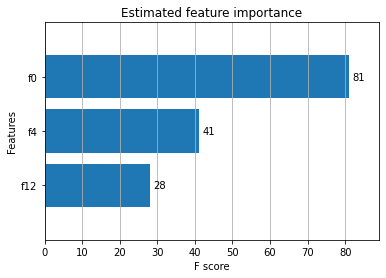

In [12]:
import matplotlib.pyplot as plt

ax = xgboost.plot_importance(bst, height=0.8, max_num_features=9)
ax.grid(False, axis="y")
ax.set_title('Estimated feature importance')
plt.show()

We specified that only 4 features were informative while creating our data, and only 3 features show up as important.

# Receiver Operating Characteristic (ROC) curve

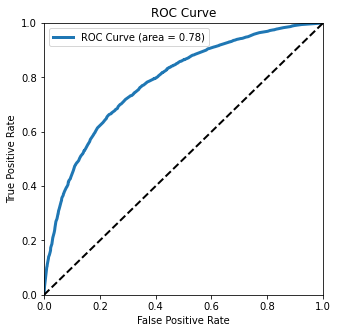

In [21]:
y_hat = dask_xgboost.predict(client, bst, X_test).persist()
import dask
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_test, y_hat = dask.compute(y_test, y_hat)
fpr, tpr, _ = roc_curve(y_test, y_hat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(fpr, tpr, lw=3,
        label='ROC Curve (area = {:.2f})'.format(auc(fpr, tpr)))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set(
    xlim=(0, 1),
    ylim=(0, 1),
    title="ROC Curve",
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend();
plt.show()

We might want to play with our parameters above or try different data to improve our solution. 

# Conclusion

Dask is a very promising technology backed by a large company. It simplifies the parallelization of existing Python-based Data science workflows.Basically, Dask lets you scale pandas and numpy with minimum changes in your code format.The lack of a more baroque frameworkdrastically reduces the barrier to entry and the ability of developersto use dask within their own libraries.